In [1]:
import pandas as pd
pd.set_option("display.width", 380)
pd.set_option('max_colwidth', 200)

from langdetect import detect

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To handle warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./dataLemmatized.csv", sep=',')

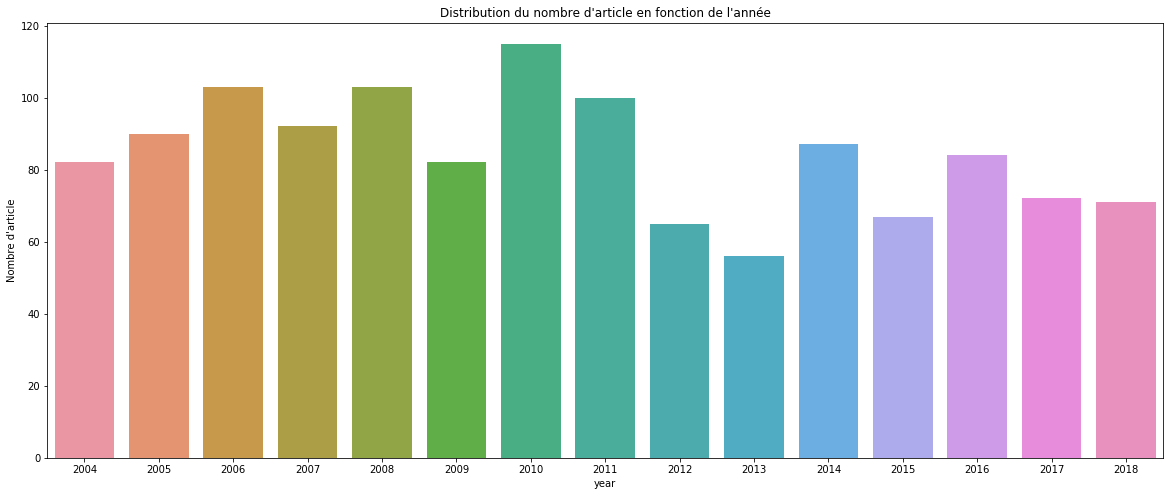

1269 articles


In [3]:
invYr = df.groupby(['year']).count()
sns.barplot(x=invYr.index, y=invYr.series)
plt.title("Distribution du nombre d'article en fonction de l'année")
plt.ylabel("Nombre d'article")
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()
print("%d articles" % len(df))

In [4]:
df['lng_title'] = df['title'].apply( lambda x : detect(x))
df['lng_abstract'] = df['abstract'].apply( lambda x : detect(x) if x is not pd.np.nan else pd.np.nan)

In [5]:
display(df[['title', 'abstract', 'lng_title', 'lng_abstract']].head(10))
print("French  title: {}\nEnglish title {}\n\nFrench  abstract {}\nEnglish abstract {}".format(
   len(df[df['lng_title'] == 'fr']), 
   len(df[df['lng_title'] == 'en']) ,
   len(df[df['lng_abstract'] == 'fr']) ,
   len(df[df['lng_abstract'] == 'en'])))


,title,abstract,lng_title,lng_abstract
0,#Idéo2017 : une plateforme citoyenne dédiée à l'analyse des tweets lors des événements politiques,"Cette plateforme a pour objectif de permettre aux citoyens d'analyserpar eux-mêmes les tweets politiques lors d'événements spécifiques en France.Pour le cas de l'élection présidentielle de 2017, #...",fr,fr
1,A two level co-clustering algorithm for very large data sets,La classification croisée (co-clustering) est une technique qui permet d'extraire la structuresous-jacente existante entre les lignes et les colonnes d'une table de données sous forme de blocs. Pl...,en,fr
2,ALGeoSPF: Un modèle de factorisation basé sur du clustering géographique pour la recommandation de POI,La recommandation de points d'intérêts est devenue une caractéristiqueessentielle des réseaux sociaux géo-localisés qui a accompagnél'émergence des échanges massifs de données digitales. Cependant...,fr,fr
3,Analyse des sentiments à partir des commentaires Facebook publiés en Arabe standard ou dialectal marocain par une approche d'apprentissage automatique,"L'analyse des sentiments est un processus pendant lequel la polarité(positive, négative ou neutre) d'un texte donné est déterminée. Nous nous intéressonsdans ce travail à l'analyse des sentiments ...",fr,fr
4,Analyse en rôles sémantiques pour le résumé automatique,Cet article présente une approche visant à extraire les informations expriméesdans un corpus de textes et en produire un résumé. Plusieurs variantes deméthodes extractives de résumé de texte ont é...,fr,fr
5,Analyse Ontologique de scénario dans un contexte Big Data,NaN,fr,NaN
6,Apport de la fouille de données pour la prévention du risque suicidaire,"Avec plus de 800 000 décès par an dans le monde, le suicide est latroisième cause de décès évitable. Il y a 20 fois plus de tentatives, impliquant denombreuses hospitalisations, des coûts humains ...",fr,fr
7,Apport des modèles locaux pour les K-moyennes prédictives,"Dans le cadre du clustering prédictif, pour attribuer la classe aux groupesformés à la fin de la phase d'apprentissage, le vote majoritaire est la méthodecommunément utilisée. Cependant, cette app...",fr,fr
8,Apprendre les relations de préférence et de co-occurrence entre les labels en classification multi-labels,"En classification multi-labels, chaque instance est associée àun ou plusieurs labels. Par exemple, un morceau de musique peut êtreassocié aux labels 'heureux' et 'relaxant'. Des relations de co-oc...",fr,fr
9,Approche contextuelle par régression pour les tests A/B,"Les tests A/B sont des procédures utilisées par les entreprises du webet de la santé entre autres, pour mesurer l'impact d'un changement de versiond'une variable par rapport à un objectif. Bien qu...",fr,fr


French  title: 1133
English title 123

French  abstract 991
English abstract 105


In [6]:
# For French
df_fr_title = df[df['lng_title'] == 'fr']
df_fr_abstract = df[df['lng_abstract'] == 'fr']

# Do the French Lem and Prepros
df['lem_prepro_title'] = df['titleLemma']
df['lem_prepro_abstract'] =  df['abstractLemma']

# Display the result
display(df[['lng_title', 'lng_abstract' ,'lem_prepro_title' ,'lem_prepro_abstract']].head())

,lng_title,lng_abstract,lem_prepro_title,lem_prepro_abstract
0,fr,fr,plateforme citoyen dédiée analyser tweets événement politiques,plateforme objectif permettre citoyen analyserpar même tweets politiques événement spécifiques france élection présidentielle analyser quasitemps message candidat fournir principal caractéristique...
1,en,fr,algorithme clustering niveau grand ensemble donnée,classification croisée clustering technique permettre extraire structuresous jacente existante entre ligne colonne tabler donnée forme bloc plusieurs application utiliser technique cependant nombr...
2,fr,fr,algeospf modèle factorisation clustering géographique recommandation,recommandation point intérêt devenir caractéristiqueessentielle réseau sociaux localiser accompagnél émergence échange massif donnée digitale cependantles faible densités point intérêt visiter uti...
3,fr,fr,analyser sentiment partir commentaire facebook publier arabe standard dialectal marocain approche apprentissage automatique,analyser sentiment processus pendant lequel polarité positive négative neutre texte donner déterminée intéressonsdans travail analyser sentiment partir commentairesfacebook réel partager arabe sta...
4,fr,fr,analyser rôle sémantique résumer automatique,article présente approcher viser extraire information expriméesdans corpus texte produire résumer plusieurs variante deméthodes extractives résumer texte implémenter évaluer leurprincipale origina...


In [7]:
# with ou without the abstract
def join_with_nan(subset_df):
    res = []
    if subset_df['lem_prepro_title'] is not pd.np.nan:
        res += subset_df['lem_prepro_title'].split()
    # if subset_df['lem_prepro_abstract'] is not pd.np.nan:
        # res += subset_df['lem_prepro_abstract'].split()
    return res

# Join the lematized title and abstract
df_all_lem = df.apply(join_with_nan, axis=1)
display(df_all_lem.head())


0                                                                       [plateforme, citoyen, dédiée, analyser, tweets, événement, politiques]
1                                                                                    [algorithme, clustering, niveau, grand, ensemble, donnée]
2                                                                  [algeospf, modèle, factorisation, clustering, géographique, recommandation]
3    [analyser, sentiment, partir, commentaire, facebook, publier, arabe, standard, dialectal, marocain, approche, apprentissage, automatique]
4                                                                                           [analyser, rôle, sémantique, résumer, automatique]
dtype: object

In [8]:
import gensim

# Custom Stop words
custom_stop_words = ['algorithme', 'étude', 'méthode', 'approche', 'nouvelle', 'algorithme', 'automatique', 'système'
                    'source', 'exemple', 'concevoir', 'ensuite', 'définir', 'effectuer']
df_all_lem = df_all_lem.apply(lambda word_list: [word for word in word_list if word not in custom_stop_words])
""

# Create Dictionary
id2word = gensim.corpora.Dictionary(df_all_lem)

count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 analyser
1 citoyen
2 dédiée
3 plateforme
4 politiques
5 tweets
6 événement
7 clustering
8 donnée
9 ensemble
10 grand


In [9]:
# Filter out tokens that appear in 
id2word.filter_extremes(no_below=15,   # - less than X documents (absolute number)
                        no_above=0.10, # - more than X documents (fraction of total corpus size, not absolute number)
                        keep_n=10000)  # - after the above two steps, keep only the first X most frequent tokens.

bow_corpus = [id2word.doc2bow(doc) for doc in df_all_lem]

In [10]:
bow_doc = bow_corpus[0]

# Pandas df
display(", ".join(df_all_lem[0]))

# bow representation
for i in range(len(bow_doc)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc[i][0],
                                               id2word[bow_doc[i][0]],
                                               bow_doc[i][1]))

'plateforme, citoyen, dédiée, analyser, tweets, événement, politiques'

Word 0 ("analyser") appears 1 time.


In [11]:
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
for doc in corpus_tfidf:
    display(doc)
    break

[(0, 1.0)]

Note two differences between the LDA and LSA runs: we asked LSA to extract 400 topics, LDA only 100 topics (so the difference in speed is in fact even greater). Secondly, the LSA implementation in gensim is truly online: if the nature of the input stream changes in time, LSA will re-orient itself to reflect these changes, in a reasonably small amount of updates. In contrast, LDA is not truly online (the name of the [3] article notwithstanding), as the impact of later updates on the model gradually diminishes. If there is topic drift in the input document stream, LDA will get confused and be increasingly slower at adjusting itself to the new state of affairs.
In short, be careful if using LDA to incrementally add new documents to the model over time. Batch usage of LDA, where the entire training corpus is either known beforehand or does not exhibit topic drift, is ok and not affected.

In [12]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=200, id2word=id2word, passes=2,  workers=4)

In [13]:
for idx, topic in lda_model.print_topics(-1)[:5]:
    print('\nTopic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.245*"application" + 0.162*"texte" + 0.143*"classification" + 0.082*"partir" + 0.081*"concept" + 0.042*"exploration" + 0.033*"séquence" + 0.031*"sélection" + 0.031*"visuel" + 0.031*"connaissance"

Topic: 1 
Words: 0.068*"utilisateur" + 0.068*"système" + 0.068*"mesure" + 0.068*"motif" + 0.068*"découverte" + 0.068*"intérêt" + 0.068*"règle" + 0.068*"modèle" + 0.068*"association" + 0.068*"recommandation"

Topic: 2 
Words: 0.412*"comparaison" + 0.310*"règle" + 0.263*"association" + 0.000*"document" + 0.000*"outil" + 0.000*"sélection" + 0.000*"modélisation" + 0.000*"objet" + 0.000*"système" + 0.000*"prédiction"

Topic: 3 
Words: 0.287*"arbre" + 0.122*"évaluation" + 0.115*"découverte" + 0.109*"décision" + 0.094*"recherche" + 0.078*"analyser" + 0.036*"objet" + 0.021*"association" + 0.020*"graphe" + 0.019*"document"

Topic: 4 
Words: 0.394*"mesure" + 0.107*"complexe" + 0.087*"partir" + 0.084*"apprentissage" + 0.070*"construction" + 0.070*"arbre" + 0.070*"supervisé" + 0.070*"s

In [14]:
#For visualising LDA Output
import pyLDAvis.gensim
from metakernel.display import display

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

In [15]:
corpus_lda = lda_model[bow_corpus]
lda_csc_matrix = gensim.matutils.corpus2csc(corpus_lda).transpose() # gensim sparse matrix to scipy sparse matrix

In [21]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=10)

kmean.fit(lda_csc_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

print('LDA matrix shape:', lda_csc_matrix.shape)

km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=4, verbose=False, random_state=10)
km.fit(lda_csc_matrix)

display(km.labels_)

df['pred'] = km.labels_

silhouette_avg = metrics.silhouette_score(lda_csc_matrix, km.labels_)
print('Silhouette Coefficient:', silhouette_avg)


LDA matrix shape: (1269, 199)


array([ 2,  2, 12, ...,  2,  2,  2], dtype=int32)

Silhouette Coefficient: 0.1697486310281348


In [83]:
start = pd.Timestamp('2004')
end = pd.Timestamp('2018')
t = np.linspace(start.value, end.value, 7)
t = pd.to_datetime(t).year
display(t)

for start, end in zip(t[:-1], t[1:]):
    _splited_df = df.query('year >= '+ str(start) + ' & year < ' + str(end+1)) 
    print("\nfrom {} to {}".format(start, end))
    display(pd.concat([_splited_df.head(3), _splited_df.tail(3)])[['year', 'title', 'pred']].head())
    display(_splited_df['pred'])
    a = _splited_df.groupby(['pred']).count().head()
    display(a.index)
    display(a.series)
    # for name, values in _splited_df.iterrows():
        # print(name, values['year'])
        # print(name, values['pred'])
    break

Int64Index([2004, 2006, 2008, 2011, 2013, 2015, 2018], dtype='int64')


from 2004 to 2006


,year,title,pred
994,2006,Accès aux connaissances orales par le résumé automatique,8
995,2006,Affectation pondérée sur des données de type intervalle,2
996,2006,Aide en gestion hospitalière par visualisation des composantes de non-pertinence,2
1266,2004,Validation de graphes conceptuels,2
1267,2004,Veille technologique assistée par la Fouille de Textes,2


994      8
995      2
996      2
997      2
998     14
999      2
1000     2
1001     5
1002     2
1003     7
1004     2
1005    17
1006     2
1007     2
1008     2
1009     2
1010     2
1011     2
1012    17
1013    16
1014     3
1015     9
1016    17
1017    15
1018     2
1019     8
1020    16
1021     2
1022     1
1023     2
        ..
1239     2
1240     5
1241     2
1242    16
1243     2
1244     2
1245     2
1246    18
1247     4
1248     2
1249     2
1250     0
1251     2
1252     2
1253     2
1254    16
1255    16
1256     0
1257     2
1258     2
1259     3
1260     8
1261     2
1262     2
1263     9
1264     2
1265     1
1266     2
1267     2
1268     2
Name: pred, Length: 275, dtype: int32

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='pred')

pred
0      5
1      9
2    152
3      6
4      8
Name: series, dtype: int64

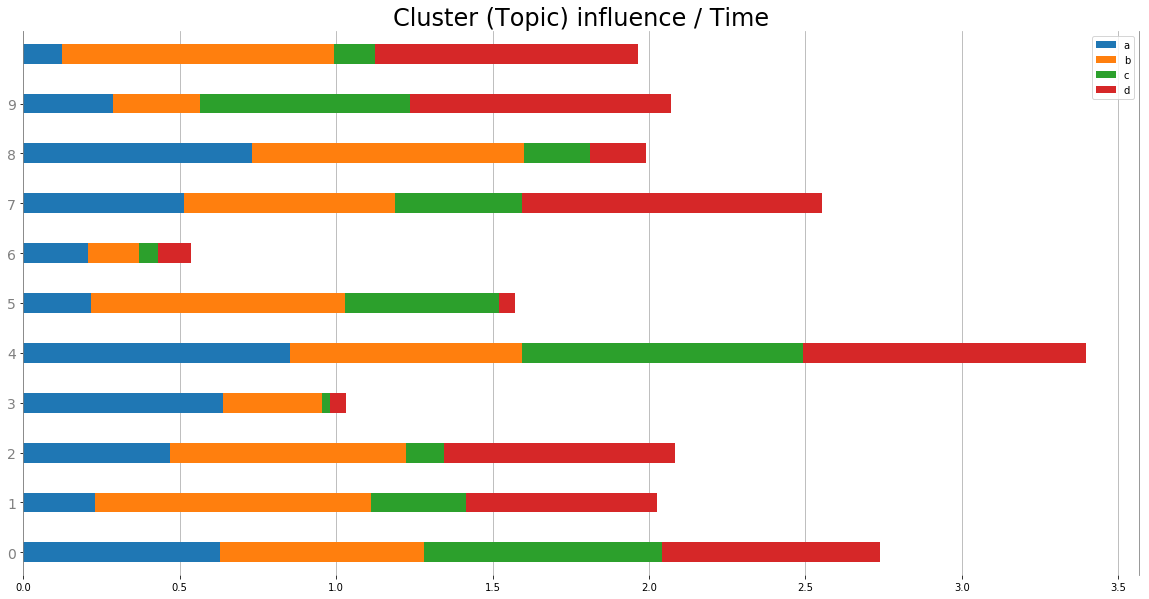

In [19]:
df2 = pd.DataFrame(np.random.rand(11, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.barh(stacked=True, figsize=(20, 10), width=0.4, )
tick_x = []
for __ in range(0,10,1):
    tick_x.append(abs(__))
plt.yticks(range(0, 10, 1), tick_x, fontsize=14, rotation=0, color='gray')
plt.gca().xaxis.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_edgecolor('gray')
plt.gca().spines['right'].set_edgecolor('gray')
plt.gca().set_axisbelow(True)
plt.title('Cluster (Topic) influence / Time', fontsize= 24)
plt.show()

In [20]:
# BIG Dump :poop:
if False:
    lda_model.save('LDA_model.gensim')
    id2word.save('dictionary.gensim')
    import pickle
    pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))